# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Collection and Processing

In [2]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv('Train.csv')

In [4]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [5]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [6]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

Mean --> average (Item_Weight - Numerical values)

Mode --> more repeated value (Outlet_Size - Categorical values)

In [7]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [8]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [9]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [13]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [15]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [16]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features

In [17]:
sns.set()

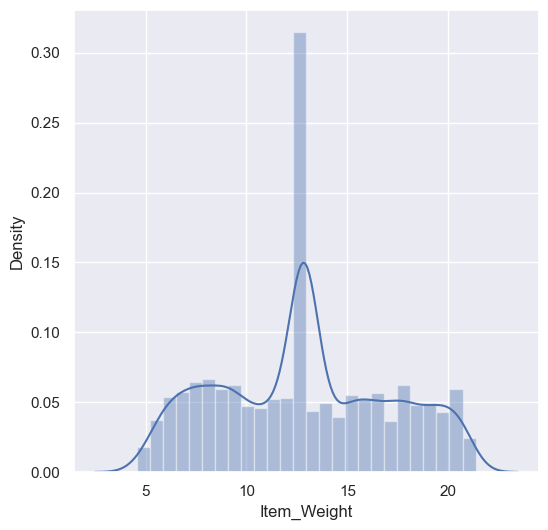

In [18]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

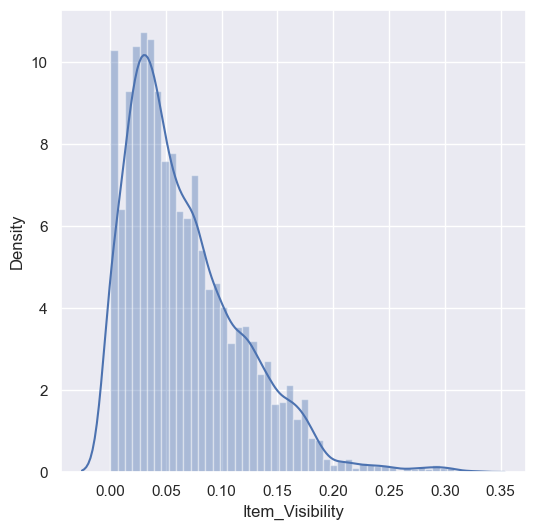

In [19]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

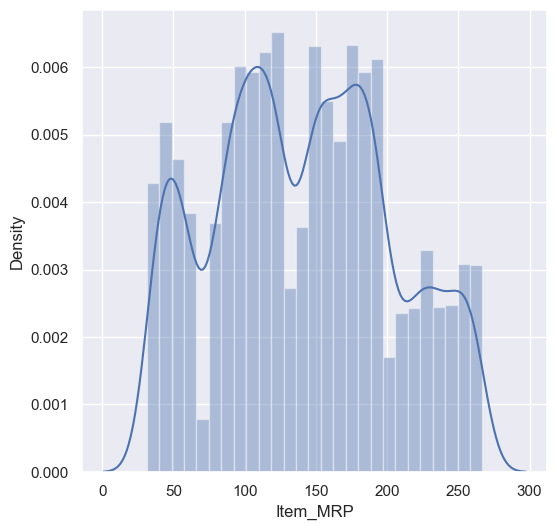

In [20]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

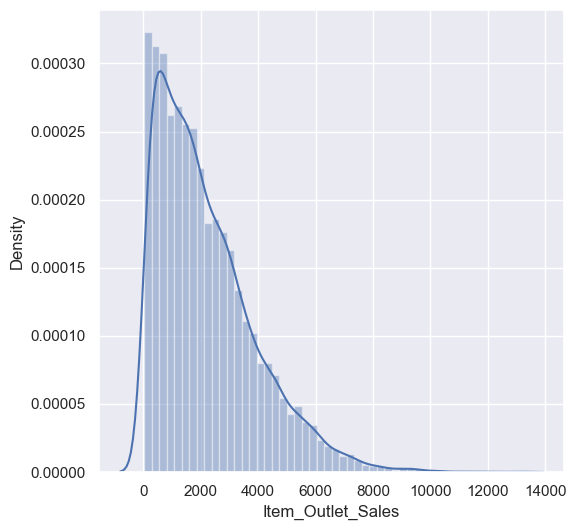

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

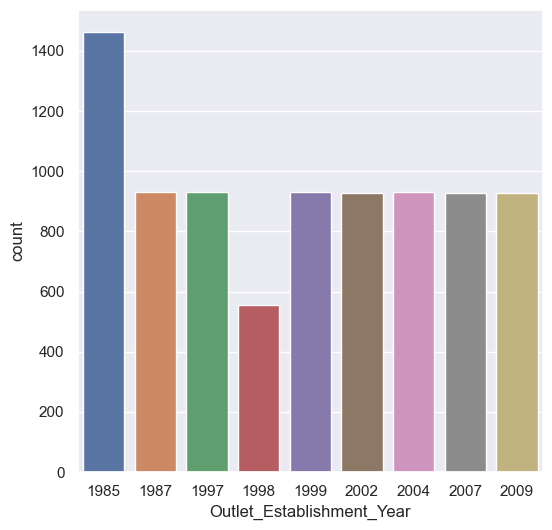

In [22]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

# Categorical Features

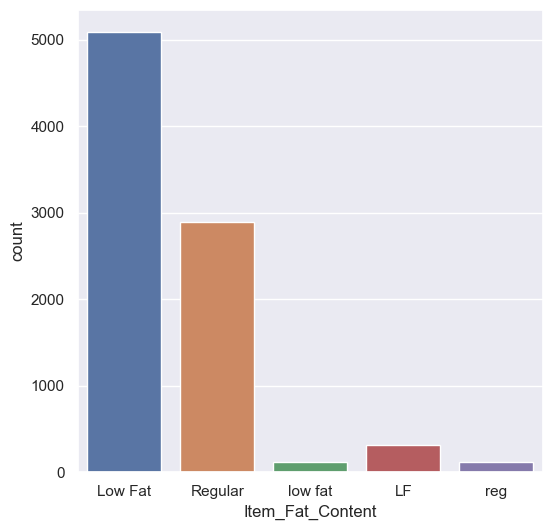

In [23]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

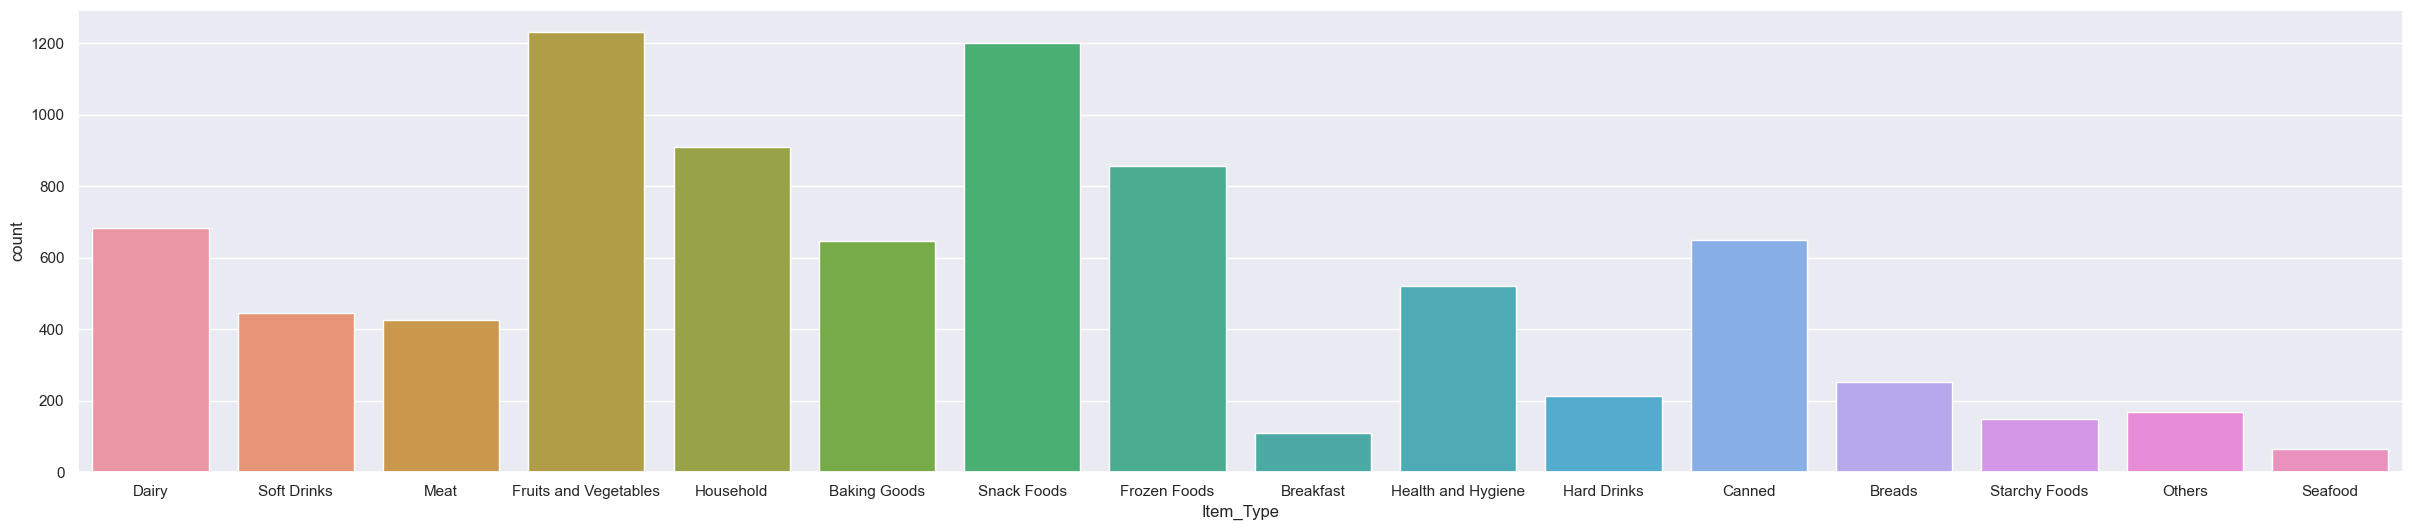

In [24]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

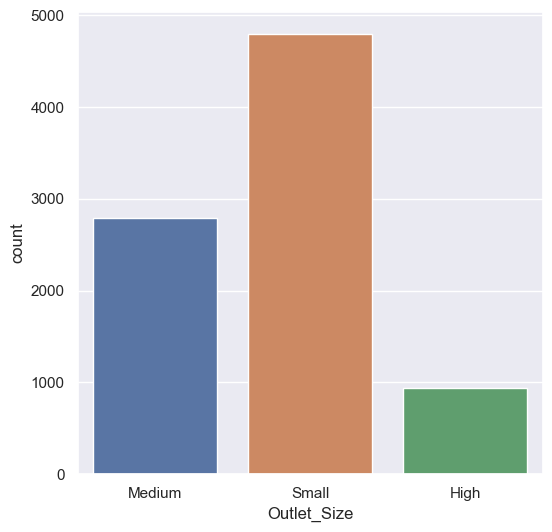

In [25]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

# Data Pre-Processing

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [30]:
encoder = LabelEncoder()

In [31]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [32]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [33]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [34]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [35]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting the data into Training data & Testing Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Training

# XGBoost Regressor

In [54]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
# prediction on training data
training_data_prediction = regressor.predict(X_train)
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value train = ', r2_train)
# prediction on test data
test_data_prediction = regressor.predict(X_test)
# R squared Value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R Squared value test = ', r2_test)
mae = mean_absolute_error(y_test, knn_predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, knn_predictions)
print(f"Mean Squared Error: {mse}")


R Squared value train =  0.8762174618111388
R Squared value test =  0.5017253991620692
Mean Absolute Error: 1220.3797696187685
Mean Squared Error: 2800685.657778509


In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
training_data_prediction = knn_regressor.predict(X_train)
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value train = ', r2_train)

knn_predictions = knn_regressor.predict(X_test)
knn_r2 = r2_score(y_test, knn_predictions) # Evaluate the models using R2 score
print(f"R Squared value test: {knn_r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, knn_predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, knn_predictions)
print(f"Mean Squared Error: {mse}")


R Squared value train =  0.5442070404819439
R Squared value test: 0.09277036662431215
Mean Absolute Error: 1220.3797696187685
Mean Squared Error: 2800685.657778509


In [63]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5)
dt_regressor.fit(X_train, y_train)
training_data_prediction = dt_regressor.predict(X_train)
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value train = ', r2_train)
dt_predictions = dt_regressor.predict(X_test)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"R Squared value test: {dt_r2}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, dt_predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, dt_predictions)
print(f"Mean Squared Error: {mse}")

R Squared value train =  0.6086924853489757
R Squared value test: 0.5802136866174552
Mean Absolute Error: 798.2394424522397
Mean Squared Error: 1295911.7118425844


In [64]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)
training_data_prediction = rf_regressor.predict(X_train)
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value train = ', r2_train)
rf_predictions = rf_regressor.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"R Squared value test: {rf_r2}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_predictions)
print(f"Mean Squared Error: {mse}")

R Squared value train =  0.6146520346621764
R Squared value test: 0.5815448532894905
Mean Absolute Error: 793.6038863368179
Mean Squared Error: 1291802.3008739303


In [65]:
# Support Vector Regressor
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(X_train, y_train)
training_data_prediction = svr_regressor.predict(X_train)
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value train = ', r2_train)
svr_predictions = svr_regressor.predict(X_test)
svr_r2 = r2_score(y_test, svr_predictions)
print(f"R Squared value test: {svr_r2}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, svr_predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, svr_predictions)
print(f"Mean Squared Error: {mse}")

R Squared value train =  0.4813485009991957
R Squared value test: 0.4550464136267477
Mean Absolute Error: 953.4660649333638
Mean Squared Error: 1682312.434870065


In [66]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
training_data_prediction = linear_regressor.predict(X_train)
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value train = ', r2_train)
linear_predictions = linear_regressor.predict(X_test)
linear_r2 = r2_score(y_test, linear_predictions)
print(f"R Squared value test: {linear_r2}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, linear_predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, linear_predictions)
print(f"Mean Squared Error: {mse}")

R Squared value train =  0.5071929167339231
R Squared value train: 0.48912987193626367
Mean Absolute Error: 944.869172118322
Mean Squared Error: 1577094.2526775703


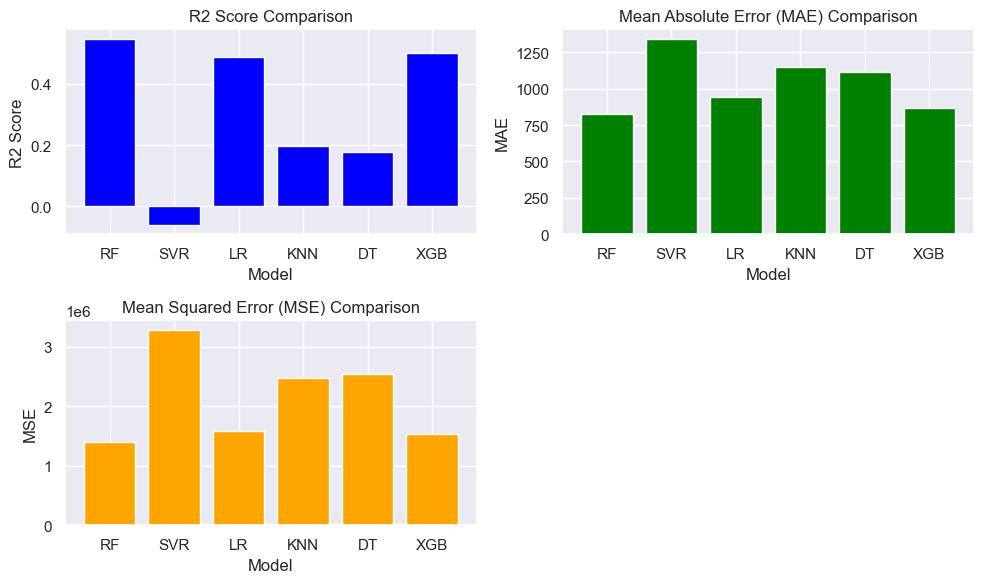

In [72]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming you have already loaded and preprocessed the dataset (X, Y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Initialize the regressor models
models = {
    'RF': RandomForestRegressor(),
    'SVR': SVR(),
    'LR': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'XGB': XGBRegressor()
}

# Initialize lists to store evaluation metrics
r2_scores = []
mae_scores = []
mse_scores = []

# Evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate R-squared
    r2 = r2_score(y_test, predictions)
    r2_scores.append(r2)
    
    # Evaluate MAE
    mae = mean_absolute_error(y_test, predictions)
    mae_scores.append(mae)
    
    # Evaluate MSE
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'R2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores
})

# Plotting
plt.figure(figsize=(10, 6))

# Plot R2 Score
plt.subplot(2, 2, 1)
plt.bar(results_df['Model'], results_df['R2 Score'], color='blue')
plt.title('R2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')

# Plot MAE
plt.subplot(2, 2, 2)
plt.bar(results_df['Model'], results_df['MAE'], color='green')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')

# Plot MSE
plt.subplot(2, 2, 3)
plt.bar(results_df['Model'], results_df['MSE'], color='orange')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()
